In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('VdanDBH.csv')

In [3]:
data.head()

,No Pohon,Jenis,DBH (cm),DBH (m),Tinggi total (m),TBBC (m),LBDSUj (m),LBDSPa (m),VolSmalian (m),BKT model baru,BKT obs-BKT est
0,13,Johar,10.0,0.10,7.40,2.30,0.002160,0.000200,0.008400,0.031436,-0.732787
1,20,Kayu Putih,3.0,0.03,3.00,0.55,0.000110,0.000500,0.000900,0.002761,-0.674018
2,87,Dilau,11.0,0.11,3.50,1.50,0.003433,0.005867,0.013125,0.038111,-0.655609
3,21,Kayu Putih,20.0,0.20,6.46,0.73,0.004820,0.010900,0.047200,0.127524,-0.629874
4,95,Johar,13.0,0.13,5.60,1.30,0.003367,0.004333,0.022300,0.053410,-0.582474


In [4]:
data.shape

(178, 11)

In [5]:
unique_values =  data.nunique()
unique_values

No Pohon            178
Jenis                43
DBH (cm)             32
DBH (m)              32
Tinggi total (m)     64
TBBC (m)             67
LBDSUj (m)          140
LBDSPa (m)          155
VolSmalian (m)      167
BKT model baru       32
BKT obs-BKT est     177
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No Pohon          178 non-null    int64  
 1   Jenis             178 non-null    object 
 2   DBH (cm)          178 non-null    float64
 3   DBH (m)           178 non-null    float64
 4   Tinggi total (m)  178 non-null    float64
 5   TBBC (m)          178 non-null    float64
 6   LBDSUj (m)        178 non-null    float64
 7   LBDSPa (m)        178 non-null    float64
 8   VolSmalian (m)    178 non-null    float64
 9   BKT model baru    178 non-null    float64
 10  BKT obs-BKT est   178 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 15.4+ KB


In [7]:
data.isna().sum()

No Pohon            0
Jenis               0
DBH (cm)            0
DBH (m)             0
Tinggi total (m)    0
TBBC (m)            0
LBDSUj (m)          0
LBDSPa (m)          0
VolSmalian (m)      0
BKT model baru      0
BKT obs-BKT est     0
dtype: int64

In [8]:
data.rename(columns={"VolSmalian (m)":"VolSmalian",
                    "DBH (m)":"DBH", "Tinggi total (m)":"Tinggi Total"} , inplace=True)

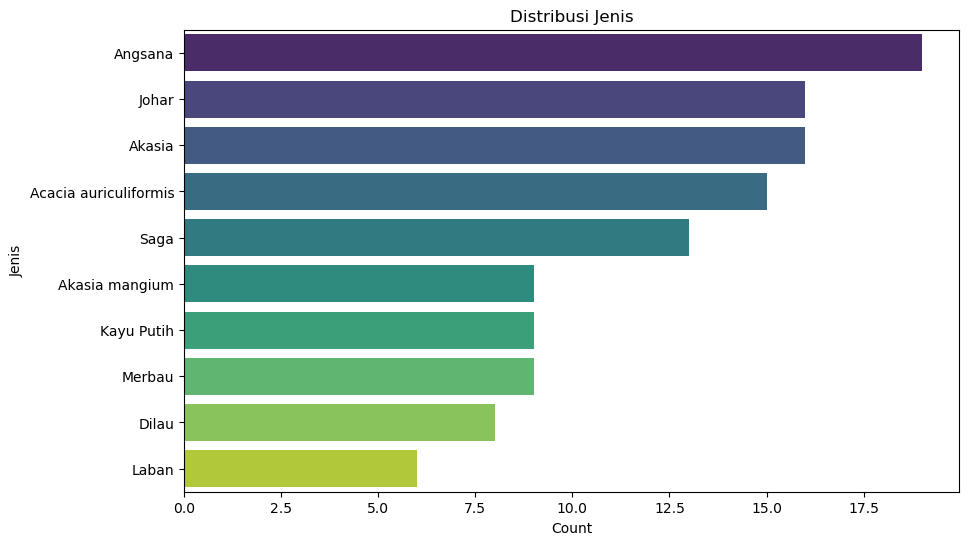

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribusi Categori 10 Teratas
category_distribution = data['Jenis'].value_counts()


plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Jenis', order=data['Jenis'].value_counts().index[:10], palette='viridis')
plt.xlabel('Count')
plt.ylabel('Jenis')
plt.title('Distribusi Jenis')
plt.show()


In [10]:
print(category_distribution)

Angsana                  19
Johar                    16
Akasia                   16
Acacia auriculiformis    15
Saga                     13
Akasia mangium            9
Kayu Putih                9
Merbau                    9
Dilau                     8
Laban                     6
Sengon                    5
Mahoni                    4
Bambang Lanang            4
Bambang lanang            4
Tui                       3
Simpur                    3
Cihu Putih                3
Nangka                    3
Seru                      2
Petai                     2
Mahang                    2
Lamtoro                   2
Meranti Merah             1
Trembesi                  1
Jambu hutan               1
Medang                    1
Rukam                     1
Langas                    1
Alpukat                   1
Dilau                     1
Bahar                     1
Kenidai                   1
Waru                      1
Cemahe                    1
Cihu                      1
Kandis              

# Analyze

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No Pohon         178 non-null    int64  
 1   Jenis            178 non-null    object 
 2   DBH (cm)         178 non-null    float64
 3   DBH              178 non-null    float64
 4   Tinggi Total     178 non-null    float64
 5   TBBC (m)         178 non-null    float64
 6   LBDSUj (m)       178 non-null    float64
 7   LBDSPa (m)       178 non-null    float64
 8   VolSmalian       178 non-null    float64
 9   BKT model baru   178 non-null    float64
 10  BKT obs-BKT est  178 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 15.4+ KB


In [12]:
data[['DBH', 'VolSmalian']].corr()

,DBH,VolSmalian
DBH,1.00000,0.87636
VolSmalian,0.87636,1.00000


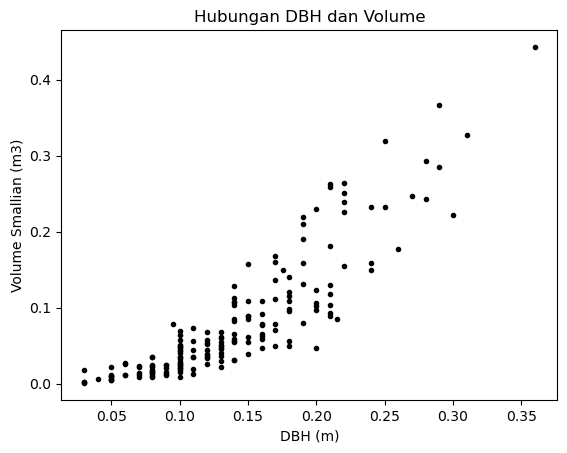

In [13]:
import matplotlib.pyplot as plt

x = data["DBH"]
y = data["VolSmalian"]

# Plot the data
plt.scatter(x, y, marker=".", color = "k")

# Add a legend and labels

plt.xlabel("DBH (m)")
plt.ylabel("Volume Smallian (m3)")

# Add a title and adjust the margins
plt.title("Hubungan DBH dan Volume")

# Show the plot
plt.show()

In [14]:
import numpy as np
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [15]:
# Melakukan FIt Linear Regression
# Create OLS model object
import statsmodels.formula.api as smf
model = smf.ols('VolSmalian~DBH',data)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_volsmalian_dbh = print_coef_std_err(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             VolSmalian   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     582.6
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           9.93e-58
Time:                        08:42:59   Log-Likelihood:                 325.30
No. Observations:                 178   AIC:                            -646.6
Df Residuals:                     176   BIC:                            -640.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0764      0.007    -10.614      0.0

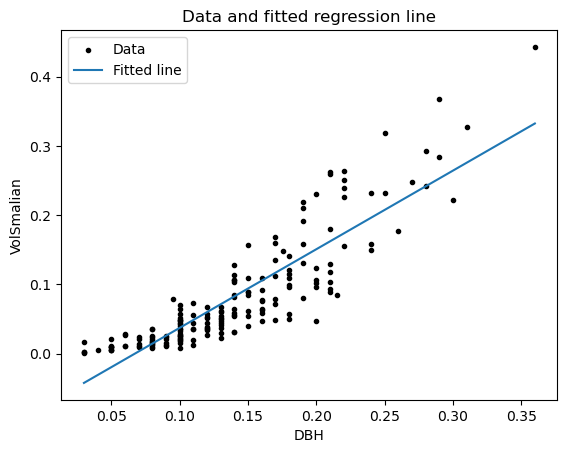

In [16]:
predictor = "DBH"
outcome = "VolSmalian"
data = data.copy()
results_ = results_volsmalian_dbh.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [17]:
results_volsmalian_dbh

,coef,std err
Intercept,-0.076398,0.007198
DBH,1.135310,0.047034


$$y = -0.076398 + 1.135310 x$$
> Artinya: rata rata volume pohon jika memiliki diameter =1 adalah 1.058 tapi ini tdk meaningful. Maka lakukan langkah centering

In [18]:
data['DBH'].describe()

count    178.000000
mean       0.139753
std        0.062537
min        0.030000
25%        0.100000
50%        0.130000
75%        0.180000
max        0.360000
Name: DBH, dtype: float64

In [19]:
data['VolSmalian'].describe()

count    178.000000
mean       0.082265
std        0.081016
min        0.000900
25%        0.024825
50%        0.054462
75%        0.108425
max        0.442900
Name: VolSmalian, dtype: float64

$$y = 0.0822+ 1.135310 (x-0.139)$$
> Artinya: rata rata volume pohon jika memiliki diameter =1 adalah 1.059 tapi ini tdk meaningful. Maka lakukan langkah centering

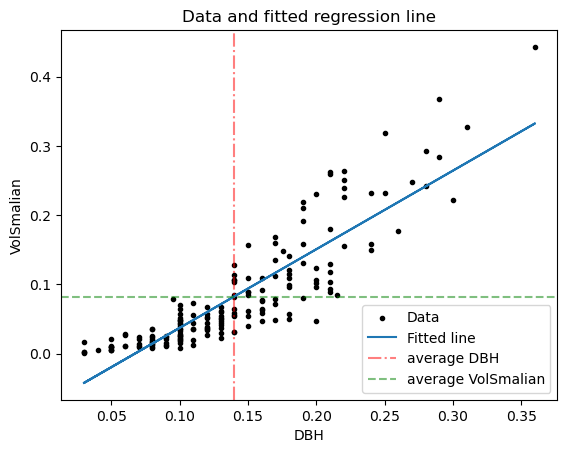

In [20]:
predictor = "DBH"
outcome = "VolSmalian"
data = data.copy()
results_ = results_volsmalian_dbh.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

fitted_values = a_hat + b_hat * data[predictor]

# Plot the fitted line
plt.plot(data[predictor], fitted_values, label="Fitted line")
plt.axvline(data[predictor].mean(), linestyle = "-.", alpha = 0.5, label = f"average {predictor}", c = "r")
plt.axhline(data[outcome].mean(), linestyle = "--", alpha = 0.5, label = f"average {outcome}", c = "g")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

## Log Transformation

In [23]:
# create new column logweight as the transformation of weight column
data['LogDBH'] = np.log(data["DBH"])

data.head(3)

,No Pohon,Jenis,DBH (cm),DBH,Tinggi Total,TBBC (m),LBDSUj (m),LBDSPa (m),VolSmalian,BKT model baru,BKT obs-BKT est,LogDBH
0,13,Johar,10.0,0.10,7.4,2.30,0.002160,0.000200,0.008400,0.031436,-0.732787,-2.302585
1,20,Kayu Putih,3.0,0.03,3.0,0.55,0.000110,0.000500,0.000900,0.002761,-0.674018,-3.506558
2,87,Dilau,11.0,0.11,3.5,1.50,0.003433,0.005867,0.013125,0.038111,-0.655609,-2.207275


In [24]:
# Create OLS model object
model = smf.ols("VolSmalian ~ LogDBH", data)

# Fit the model
model_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_dbh_log = print_coef_std_err(model_logtransform)

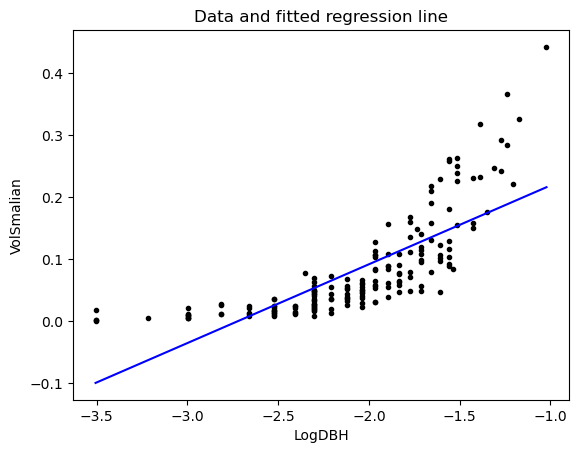

In [25]:
predictor = "LogDBH"
outcome = "VolSmalian"
data = data.copy()
results_ = results_dbh_log.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [26]:
model_logtransform.rsquared

0.5901798509822116

In [28]:
results_dbh_log

,coef,std err
Intercept,0.346339,0.017039
LogDBH,0.127190,0.007989


In [31]:
print(model_logtransform.summary())

                            OLS Regression Results                            
Dep. Variable:             VolSmalian   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     253.5
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           6.30e-36
Time:                        08:56:16   Log-Likelihood:                 274.65
No. Observations:                 178   AIC:                            -545.3
Df Residuals:                     176   BIC:                            -538.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3463      0.017     20.326      0.0